# LGM_Task 6 : Prediction Using Decision Tree Algorithm

# Overview of the Project

This project aims to predict the species of Iris flowers using a decision tree algorithm. Steps include data acquisition, preprocessing, building and evaluating the decision tree model. The model's performance is assessed using metrics such as accuracy, and feature importance is analyzed to understand the contribution of different attributes. The trained model is then used to make predictions on new data, and the project concludes with summarizing findings and discussing practical applications.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as plot_confusion_matrix


In [2]:
# Loading the Dataset
# Reading the Dataset
data=pd.read_csv("Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
14,15,5.8,4.0,1.2,0.2,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
19,20,5.1,3.8,1.5,0.3,Iris-setosa
103,104,6.3,2.9,5.6,1.8,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
34,35,4.9,3.1,1.5,0.1,Iris-setosa
135,136,7.7,3.0,6.1,2.3,Iris-virginica


In [4]:
data.shape

(150, 6)

In [5]:
# Dataset Columns
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
#Dataset Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#Dataset Statistical Summary
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#Checking Null Values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
#Checking columns count of "Species"
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Data Visualization

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

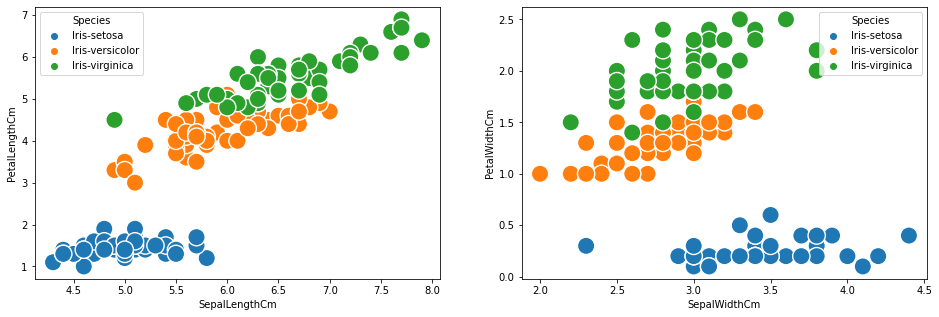

In [11]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=data,hue='Species',ax=ax1,s=300,marker='o')
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=data,hue='Species',ax=ax2,s=300,marker='o')


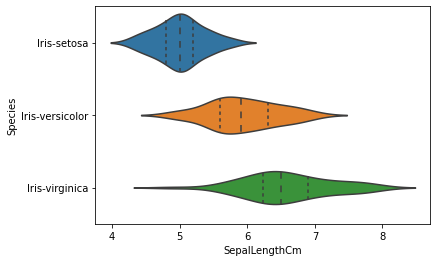

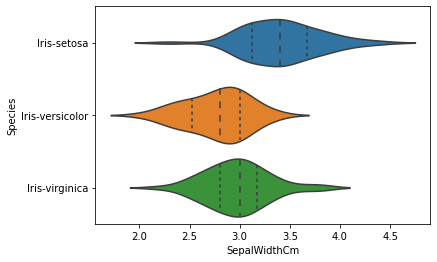

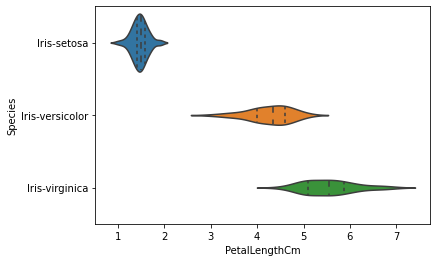

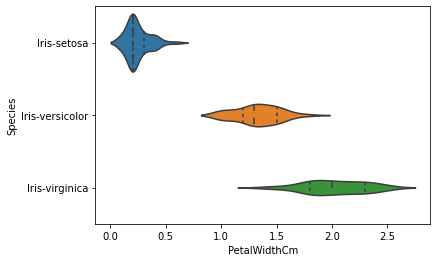

In [12]:
sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()


<AxesSubplot:ylabel='Species'>

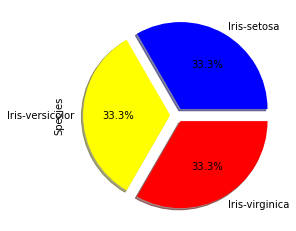

In [13]:
#Pie plot to show the overall types of Iris classifications
colors = ['blue','yellow','red']
data['Species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True,colors=colors, explode = [0.08,0.08,0.08])

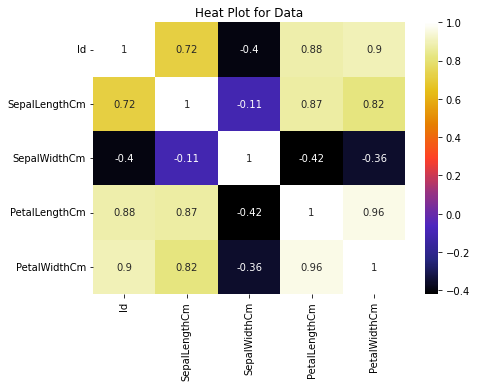

In [14]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True,cmap='CMRmap')
plt.title('Heat Plot for Data')
plt.show()

In [15]:
#Defining independent and dependent variables
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = data.loc[:, features].values   #defining the feature matrix
y = data.Species

## Splitting the dataset into training and test sets

In [16]:
#Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=0)

#Defining the decision tree classifier and fitting the training set
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Visualizing the decision tree

[Text(0.4, 0.9, 'petal width(cm) <= 0.75\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]\nclass = Iris-virginica'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.7, 'petal length(cm) <= 4.95\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]\nclass = Iris-virginica'),
 Text(0.2, 0.5, 'petal width(cm) <= 1.65\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = Iris-versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]\nclass = Iris-versicolor'),
 Text(0.3, 0.3, 'sepal width(cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.8, 0.5, 'petal width(cm) <= 1.75\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]\nclass = Iris-virginica'),
 Text(0.7, 0.3, 'petal length(cm) <= 5.05\ngini = 0.444\nsamples =

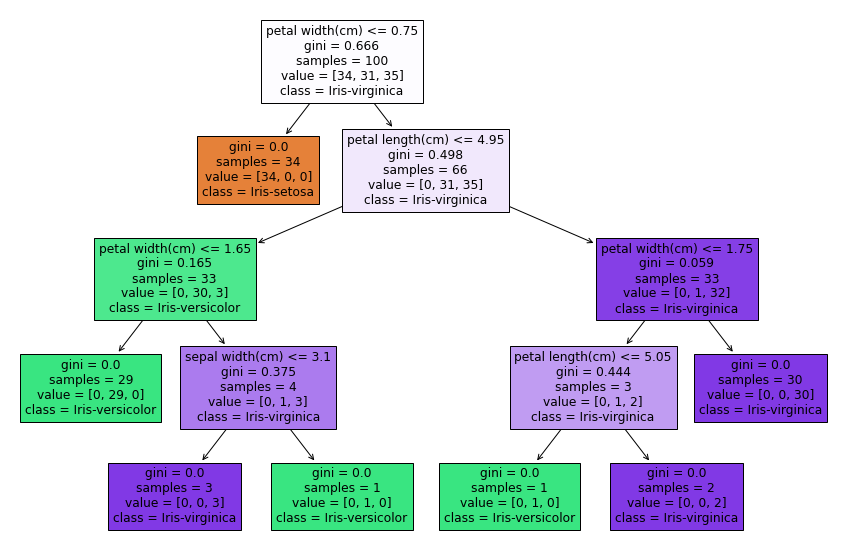

In [17]:
#Visualizing the decision tree
from sklearn import tree
feature_name =  ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name= data.Species.unique()
plt.figure(figsize=(15,10))
tree.plot_tree(dtree, filled = True, feature_names = feature_name, class_names= class_name)


## Prediction on test data

In [18]:
#Prediction on test data
y_pred = dtree.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

## Checking the accuracy of the model

In [19]:
#Checking the accuracy of the model
score=accuracy_score(y_test,y_pred)
print("Accuracy:",score)

Accuracy: 0.96


## plotting confusion matrix

In [20]:
def report(model):
    preds=model.predict(X_test)
    sklearn.metrics.plot_confusion_matrix(model,X_test,y_test,cmap='nipy_spectral',colorbar=True)

In [21]:
print('Decision Tree Classifier')

print(f'Accuracy: {round(score*100,2)}%')


Decision Tree Classifier
Accuracy: 96.0%


In [22]:
confusion_matrix(y_test, y_pred)


array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 14]], dtype=int64)

In [23]:
#Predicting the output class for random values for petal and sepal length and width
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 5cm, 3.6cm, 1.4cm and 0.2cm respectively

dtree.predict([[5, 3.6, 1.4 , 0.2]])

array(['Iris-setosa'], dtype=object)

In [24]:
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 9cm, 3.1cm, 5cm and 1.5cm respectively

dtree.predict([[9, 3.1, 5, 1.5]])

array(['Iris-versicolor'], dtype=object)

In [25]:
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 4.1cm, 3cm, 5.1cm and 1.8cm respectively

dtree.predict([[4.1, 3.0, 5.1, 1.8]])

array(['Iris-virginica'], dtype=object)

# Result

The decision tree algorithm achieved an accuracy of 96.0% in predicting the Iris species. The model successfully classified the Iris flowers based on their measurements with high precision. This result indicates the effectiveness of the decision tree algorithm in accurately identifying the species of Iris flowers.

# Conclusion

The decision tree algorithm proved to be highly effective in predicting the species of Iris flowers based on their measurements. The model achieved an accuracy of 96.0%, indicating its strong predictive power. The analysis revealed that certain features, such as petal length, sepal width, sepal length and petal width, played a significant role in the classification process. This project highlights the practical application of the decision tree algorithm in species identification and showcases its potential in the field of botanical research.